# LDA에서 Author Topic Model

In [1]:
from IPython.display import Image

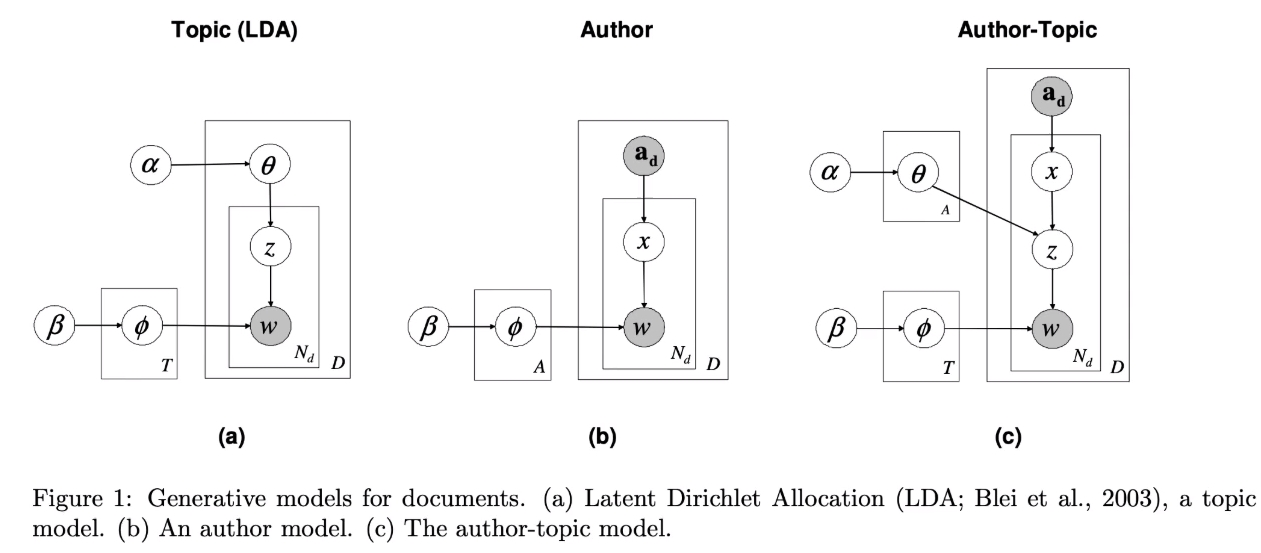

In [2]:
Image(filename='data/atm_fig.jpg')

* LDA에서 저자 정보(metadata)가 추가된 토픽모델.
* 문서별 단어분포를 반영하던 파라미터에, <b>저자별 문서분포</b> 정보까지 추가된 형태.

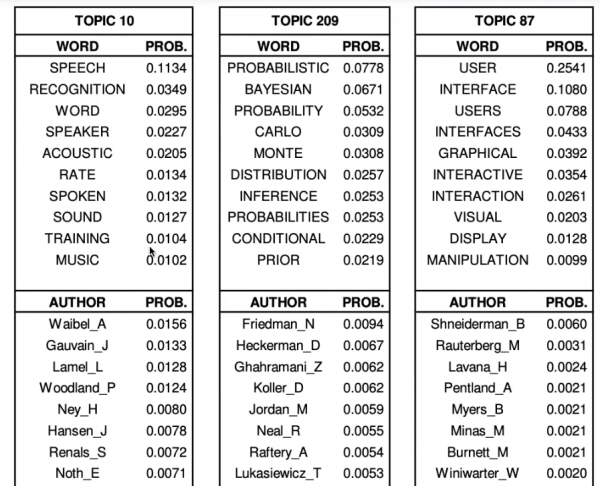

In [3]:
Image(filename='data/atm_fig2.jpg')

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

import pickle

In [2]:
# load data
with open("data/cleaned_katalk_data.pk", "rb") as f:
    data = pickle.load(f)
    
print(data.head())
print(data.info())

                date user                                            message
0  2016. 3. 7. 15:41   YH  안녕하세요 이게 빠르지 않을까 해서요 엠티 관련해서는 회장님께서 이미 밴드에 올려 ...
1  2016. 3. 7. 15:51   WH                                           네 안녕하세요 
2  2016. 3. 7. 17:14   YH  넵 저희 카톡방을 만들어서 거기다 투표를 돌릴까요 아님 그냥 밴드에 두개로 할까요 총무님
3  2016. 3. 7. 17:21   KS                            엠티관련해서 참석여부 투표를 말씀하신건가요
4  2016. 3. 7. 17:22   YH                       네 저희 이번 토욜 관련해서도 투표를 올려야 해서요
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14911 entries, 0 to 14910
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     14911 non-null  object
 1   user     14911 non-null  object
 2   message  14911 non-null  object
dtypes: object(3)
memory usage: 349.6+ KB
None


In [3]:
users = set(data["user"])
users

{'BJ', 'BR', 'GM', 'HL', 'KS', 'WH', 'YH'}

In [4]:
authors = data.groupby('user')
pprint(authors.groups)

{'BJ': Int64Index([ 1161,  1162,  1164,  1168,  1169,  1173,  1179,  1180,  1181,
             1185,
            ...
            14857, 14859, 14863, 14864, 14877, 14878, 14880, 14883, 14885,
            14886],
           dtype='int64', length=4222),
 'BR': Int64Index([   23,    25,    32,    54,    77,    78,    79,    80,    83,
               84,
            ...
            14887, 14890, 14892, 14893, 14896, 14901, 14902, 14904, 14906,
            14910],
           dtype='int64', length=2824),
 'GM': Int64Index([  272,   351,   405,   564,   652,   715,   736,   814,   821,
              904,
            ...
            14671, 14674, 14676, 14680, 14684, 14688, 14691, 14695, 14697,
            14700],
           dtype='int64', length=554),
 'HL': Int64Index([   19,    20,    49,    50,    52,    55,    57,   115,   116,
              118,
            ...
            14871, 14876, 14888, 14889, 14891, 14895, 14897, 14899, 14903,
            14907],
           dtype='int64', length=

In [5]:
# 사용자별 문서 그룹핑
author2doc = {}

for user, index in authors.groups.items():
    author2doc[user] = list(index)

### gensim을 이용한 Author Topic Model

In [6]:
tokenized_data = [msg.split() for msg in list(data["message"])]

print(tokenized_data[:10])

[['안녕하세요', '이게', '빠르지', '않을까', '해서요', '엠티', '관련해서는', '회장님께서', '이미', '밴드에', '올려', '주셨어요'], ['네', '안녕하세요'], ['넵', '저희', '카톡방을', '만들어서', '거기다', '투표를', '돌릴까요', '아님', '그냥', '밴드에', '두개로', '할까요', '총무님'], ['엠티관련해서', '참석여부', '투표를', '말씀하신건가요'], ['네', '저희', '이번', '토욜', '관련해서도', '투표를', '올려야', '해서요'], ['밴드보다는', '카톡이', '더', '접근성이', '있지', '않을까요'], ['제가', '연락처', '다', '저장해서', '전체', '카톡방', '만들겠습니다'], ['혹시', '정도상님', '연락처가', '카톡에', '저장되지', '않는데'], ['혹시', '저장되신분', '있으신가요'], ['연락처', '정도상5기', 'KMBDMBA']]


In [7]:
from gensim.models import AuthorTopicModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary, bleicorpus
from gensim.matutils import hellinger
from gensim import corpora
from tqdm import tqdm_notebook
from time import time
import os

In [8]:
dict_file = 'data/kakao_ATM_dict'
corpus_file = 'data/kakao_ATM_corpus'

# dictionary (word) <--> corpus (id)

# ATM에 사용할 Dictionary 만들기
if not os.path.exists(dict_file):
    dictionary = corpora.Dictionary(tokenized_data)
    dictionary.save(dict_file)
    print(dictionary)
else:
    dictionary = Dictionary.load(dict_file)

# ATM에 사용할 corpus 만들기
if not os.path.exists(corpus_file):
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]
    corpora.BleiCorpus.serialize(corpus_file, corpus)
else:
    corpus = bleicorpus.BleiCorpus(corpus_file)

In [9]:
print('Number of authors      : %d' % len(authors))
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents    : %d' % len(corpus))

Number of authors      : 7
Number of unique tokens: 19955
Number of documents    : 14911


In [10]:
# dictionary에 있는 단어 보기
print(dictionary)

for idx in dictionary:
    print(idx, dictionary[idx])
    
    if idx == 10: break

Dictionary(19955 unique tokens: ['관련해서는', '밴드에', '빠르지', '안녕하세요', '않을까']...)
0 관련해서는
1 밴드에
2 빠르지
3 안녕하세요
4 않을까
5 엠티
6 올려
7 이게
8 이미
9 주셨어요
10 해서요


In [11]:
# 사람이 이해할 수 있는 형태로 코퍼스 사전 재구성 (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus][:3]

[[('관련해서는', 1.0),
  ('밴드에', 1.0),
  ('빠르지', 1.0),
  ('안녕하세요', 1.0),
  ('않을까', 1.0),
  ('엠티', 1.0),
  ('올려', 1.0),
  ('이게', 1.0),
  ('이미', 1.0),
  ('주셨어요', 1.0),
  ('해서요', 1.0),
  ('회장님께서', 1.0)],
 [('안녕하세요', 1.0), ('네', 1.0)],
 [('밴드에', 1.0),
  ('거기다', 1.0),
  ('그냥', 1.0),
  ('넵', 1.0),
  ('돌릴까요', 1.0),
  ('두개로', 1.0),
  ('만들어서', 1.0),
  ('아님', 1.0),
  ('저희', 1.0),
  ('총무님', 1.0),
  ('카톡방을', 1.0),
  ('투표를', 1.0),
  ('할까요', 1.0)]]

In [12]:
# Author Topic Model 실행

model_path = 'data/kakao_ATM_model'
if not os.path.exists(model_path):
    model = AuthorTopicModel(corpus=corpus, 
                             num_topics=4, 
                             id2word=dictionary.id2token, 
                             author2doc=author2doc, 
                             passes=10)
    model.save(model_path)
else:
    model = AuthorTopicModel.load(model_path)

In [13]:
model.show_topic(0)

[('나', 0.010368158594930087),
 ('나도', 0.005641677219910483),
 ('다', 0.00549259642870929),
 ('완전', 0.004452450579120248),
 ('그래서', 0.003992346335516386),
 ('내가', 0.003966104395676567),
 ('오', 0.0037888147726983542),
 ('역시', 0.0036775522938288637),
 ('근데', 0.003638984283893234),
 ('어제', 0.00346218867638447)]

In [14]:
model.show_topic(1)

[('내가', 0.005889143519467075),
 ('나', 0.005382679330915128),
 ('형', 0.004675763941585595),
 ('부끄', 0.004323705003887456),
 ('누나', 0.0037521905195854878),
 ('지금', 0.0035098066160478853),
 ('근데', 0.0033245583859888477),
 ('없어', 0.003311321438405062),
 ('나도', 0.0031244904139345934),
 ('헐', 0.0030329782207485674)]